# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [4]:
cities


['kapaa',
 'kaitangata',
 'kogon',
 'rikitea',
 'ushuaia',
 'mataura',
 'hilo',
 'sitka',
 'jamestown',
 'chokurdakh',
 'grand centre',
 'carnarvon',
 'la ronge',
 'hobart',
 'dikson',
 'grand river south east',
 'port alfred',
 'mahebourg',
 'macusani',
 'punta arenas',
 'lavrentiya',
 'kyabe',
 'yar-sale',
 'vaini',
 'saint-joseph',
 'lamas',
 'nara',
 'serebryanyy bor',
 'nova olimpia',
 'pacifica',
 'mahadday weyne',
 'belushya guba',
 'linhares',
 'hermanus',
 'busselton',
 'ilulissat',
 'meyungs',
 'severo-kurilsk',
 'pevek',
 'san patricio',
 'saint-philippe',
 'san cristobal',
 'cherskiy',
 'mount isa',
 'verkhnevilyuysk',
 'tuktoyaktuk',
 'cape town',
 'baragaon',
 'albany',
 'berezovyy',
 'saint george',
 'burica',
 'constitucion',
 'contamana',
 'gat',
 'tura',
 'torbay',
 'zabaykalsk',
 'belen',
 'saldanha',
 'bambous virieux',
 'talnakh',
 'newport',
 'muros',
 'banda aceh',
 'taoudenni',
 'onega',
 'rossland',
 'vila',
 'barentsburg',
 'avarua',
 'saiha',
 'deputatskiy',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
city_id =[]
lat=[]
long=[]
temp=[]
clouds=[]
humidity=[]
wind_speed=[]


for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ 'imperial'
    weather_response1 = requests.get(query_url)
    weather1_json = weather_response1.json()
    try:
        city_name.append(weather1_json['name'])
        city_id.append(weather1_json['id'])
        temp.append(weather1_json['main']['temp'])
        lat.append(weather1_json['coord']['lat'])
        long.append(weather1_json['coord']['lon'])
        clouds.append(weather1_json['clouds']['all'])
        humidity.append(weather1_json['main']['humidity'])
        wind_speed.append(weather1_json['wind']['speed'])
        print(f"{city}: {weather1_json['id']}")
    except KeyError:
        print(f"{city} is not available")
        

kapaa: 5848280
kaitangata: 2208248
kogon: 1217180
rikitea: 4030556
ushuaia: 3833367
mataura: 6201424
hilo: 5855927
sitka: 5557293
jamestown: 5122534
chokurdakh: 2126123
grand centre is not available
carnarvon: 2074865
la ronge: 6050066
hobart: 2163355
dikson: 1507390
grand river south east is not available
port alfred: 964432
mahebourg: 934322
macusani: 3935624
punta arenas: 3874787
lavrentiya: 4031637
kyabe: 2429344
yar-sale: 1486321
vaini: 4032243
saint-joseph: 6690296
lamas: 3695757
nara: 1855612
serebryanyy bor: 2016977
nova olimpia: 3456137
pacifica: 5380420
mahadday weyne is not available
belushya guba is not available
linhares: 3458498
hermanus: 3366880
busselton: 2075265
ilulissat: 3423146
meyungs is not available
severo-kurilsk: 2121385
pevek: 2122090
san patricio: 4726521
saint-philippe: 935215
san cristobal: 3628473
cherskiy: 2126199
mount isa: 2065594
verkhnevilyuysk: 2013639
tuktoyaktuk: 6170031
cape town: 3369157
baragaon: 1277135
albany: 5106841
berezovyy: 2026786
saint 

araouane: 2460954
norsup: 2135517
dharchula: 1272864
omboue: 2396853
berlevag: 780687
boa vista: 3664980
cabo san lucas: 3985710
hofn: 2630299
nemuro: 2128975
faya: 110690
nago: 1856068
aitape: 2101169
warqla is not available
andrieseni: 686341
kathmandu: 1283240
igarka: 1505991
sanger: 5392868
madimba: 878141
jalu: 86049
angoche: 1052944
katsuura: 2112309
moron: 3430545
hami: 1529484
manyana: 933416
hutchinson: 4273299
coos bay: 5720495
alofi: 4036284
ust-barguzin: 2013986
buseresere: 160833
santa maria del oro: 3984078
gamba: 2400547
longkou: 1802550
aguilas: 2522333
liverpool: 2644210
zella-mehlis: 2804867
margate: 2643044
vanavara: 2013727
baykit: 1510689
plettenberg bay: 964712
kungurtug: 1501377
vila velha: 3445026
caraquet: 6942803
paka: 1734313
acarau: 3408368
zhangye: 1785036
juifang is not available
salinopolis: 3389822
port arthur: 1801722
bonito: 3469294
morehead: 4301317
bima: 1648759
rio tercero: 3838793
makat: 608872
prattville: 4084796
dwarka: 1272140
ornskoldsvik: 2686

In [8]:
len(lat)

571

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict={'city': city_name,
           'city_id':city_id,
           'latitude': lat,
           'longitude': long,
           'temperature': temp,
           'cloudiness': clouds,
           'humidity':humidity,
           'wind_speed':wind_speed}
weather_dict
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(r'weather_search.csv')
weather_df

,city,city_id,latitude,longitude,temperature,cloudiness,humidity,wind_speed
0,Kapaa,5848280,22.0752,-159.3190,69.96,75,78,12.66
1,Kaitangata,2208248,-46.2817,169.8464,50.00,39,88,1.99
2,Kogon,1217180,39.7228,64.5517,71.60,0,26,4.61
3,Rikitea,4030556,-23.1203,-134.9692,78.94,95,71,20.24
4,Ushuaia,3833367,-54.8000,-68.3000,42.80,90,87,2.26
...,...,...,...,...,...,...,...,...
566,Makakilo City,5850554,21.3469,-158.0858,69.78,1,73,4.61
567,Auki,2109701,-8.7676,160.7034,76.44,76,87,3.09
568,Umm Kaddadah,364933,13.6017,26.6876,97.84,71,9,7.85
569,Krasnosel'kup,1502073,65.7000,82.4667,32.18,19,84,18.54


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
len(weather_df.loc[weather_df['humidity']>100])

0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature vs. Latitude')

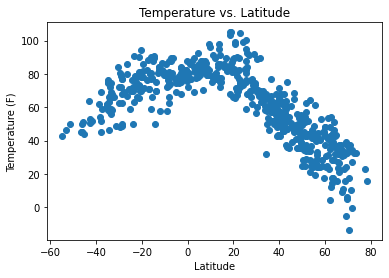

In [11]:
x=weather_df['latitude']
y=weather_df['temperature']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude")

- As expected, tempertures rise the as you get closer to the equator.  The northern hemispere is still in early sprig and therefore has lower temperatures.  (Analysis 4/22)

## Latitude vs. Humidity Plot

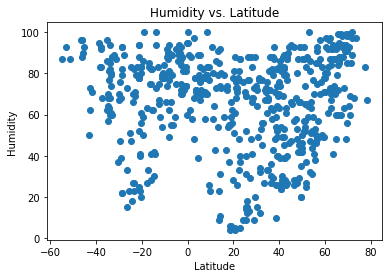

In [12]:
x=weather_df['latitude']
y=weather_df['humidity']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.show()

 - Latitude doesn't appear to have an effect on high levels of humidity.  Although lower humidity levels are more prominent in the northern hemisphere, which could be a seasonal effect. (Analysis 4/22)

## Latitude vs. Cloudiness Plot

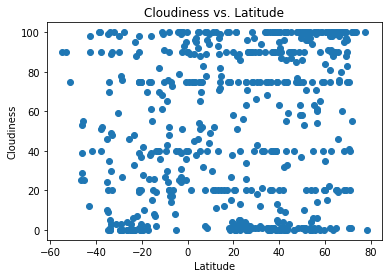

In [13]:
x=weather_df['latitude']
y=weather_df['cloudiness']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude")
plt.show()

- Latitude doesn't have any affect on cloudiness.  (Analysis 4/22)

## Latitude vs. Wind Speed Plot

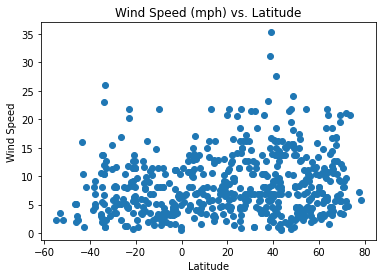

In [14]:
x=weather_df['latitude']
y=weather_df['wind_speed']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.show()

- There doesn't appear to be any relationship between wind speed and latitude. (Analysis 4/22)

## Linear Regression

In [15]:
northern_hem_df = weather_df.loc[weather_df['latitude']>=0]
#northern_hem_df

southern_hem_df = weather_df.loc[weather_df['latitude']<=0]
southern_hem_df

,city,city_id,latitude,longitude,temperature,cloudiness,humidity,wind_speed
1,Kaitangata,2208248,-46.2817,169.8464,50.00,39,88,1.99
3,Rikitea,4030556,-23.1203,-134.9692,78.94,95,71,20.24
4,Ushuaia,3833367,-54.8000,-68.3000,42.80,90,87,2.26
5,Mataura,6201424,-46.1927,168.8643,45.00,29,96,5.01
10,Carnarvon,2074865,-24.8667,113.6333,69.80,1,83,10.36
...,...,...,...,...,...,...,...,...
561,Kaniama,214389,-7.5667,24.1833,74.25,17,80,4.32
562,Ahipara,2194098,-35.1667,173.1667,61.66,10,86,10.60
564,Collie,2074113,-33.3667,116.1500,55.99,89,80,1.01
567,Auki,2109701,-8.7676,160.7034,76.44,76,87,3.09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

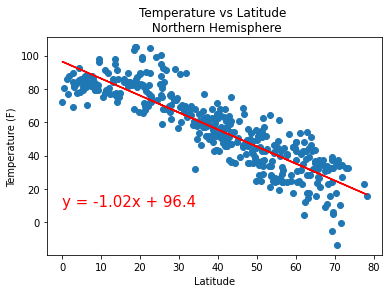

In [16]:
x=northern_hem_df['latitude']
y=northern_hem_df['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Temperature vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

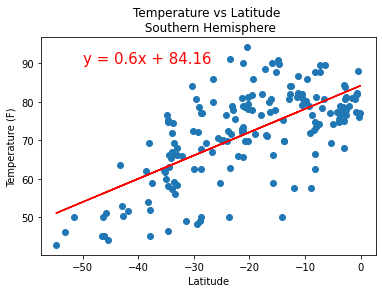

In [22]:
x=southern_hem_df['latitude']
y=southern_hem_df['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Temperature vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.show()

- As stated above, latitude has a directly correlated to temperatures.  The closer you are to the equator, the higher the temperatures.  This is evidenced with the regression line for both the northern and southern hemispheres graphs. (Analysis 4/22)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

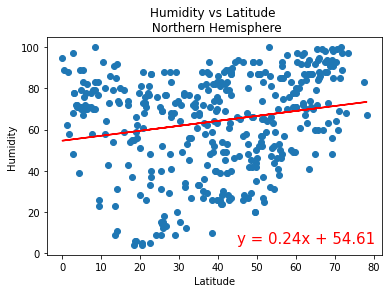

In [23]:
x=northern_hem_df['latitude']
y=northern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(45,5),fontsize=15,color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

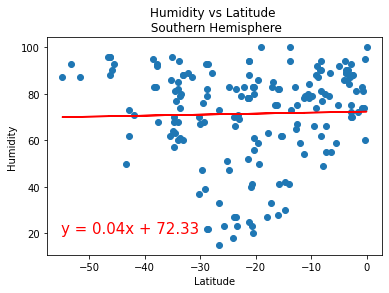

In [24]:
x=southern_hem_df['latitude']
y=southern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.show()

- Latitude no affect on humidity for either the northern or southern hemisphere.  This is confirmed with the respective low r-values, northern (0.24) and southern (0.04).  (Analysis 4/23)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

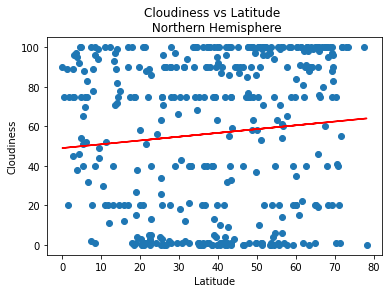

Linear regression: y = 0.19x + 49.0


In [33]:
x=northern_hem_df['latitude']
y=northern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Northern Hemisphere")
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

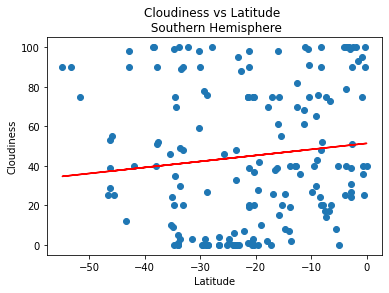

Linear regression: y = 0.3x + 51.38


In [35]:
x=southern_hem_df['latitude']
y=southern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Southern Hemisphere")
plt.show()
print(f"Linear regression: {line_eq}")

Latitude no affect on cloudiness for either the northern or southern hemisphere. This is confirmed with the respective low r-values, northern (0.34) and southern (0.3).  The northern hemisphere's higher r-value may be due to seasonality as it is early spring.  (Analysis 4/23)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

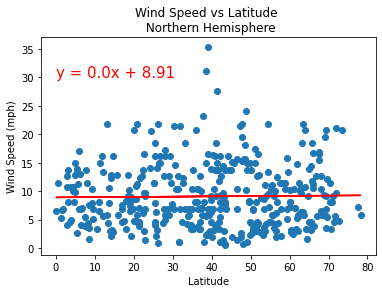

Linear regression: y = 0.0x + 8.91


In [40]:
x=northern_hem_df['latitude']
y=northern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,30),fontsize=15,color='red')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

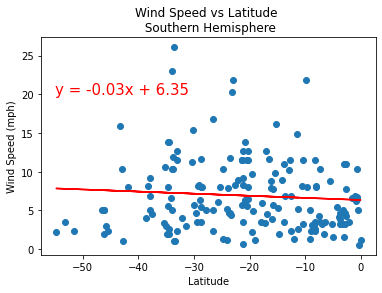

Linear regression: y = -0.03x + 6.35


In [41]:
x=southern_hem_df['latitude']
y=southern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.show()
print(f"Linear regression: {line_eq}")

Wind speed is not related to latitude.   This is confirmed with the respective low r-values, northern (0.0) and southern (0.03). (Analysis 4/23)